This is a 2nd workbook in Week 3. It looks further into steps required for model improvement once we understand train loss and validation loss.

Indicators:
* High train loss (more than human mistake) -> High Bias (underfitting)
* Low train loss but high Validation loss -> High Variance (overfitting)

<img src='images/C2_W3_BiasVariance.png' height=200px>

To fix a high bias problem:
* try adding polynomial features
* try getting additional features
* try decreasing the regularization parameter

To fix a high variance problem:
* try increasing the regularization parameter
* try smaller sets of features
* get more training examples

# Baseline performance

Before you can diagnose a model for high bias or high variance, it is usually helpful to first have an idea of what level of error you can reasonably get to. As mentioned in class, you can use any of the following to set a baseline level of performance.

* human level performance
* competing algorithm's performance
* guess based on experience

Real-world data can be very noisy and it's often infeasible to get to 0% error. For example, you might think that you have a high bias problem because you're getting 10% training and 15% cross validation error on a computer vision application. However, you later found out that even humans can't perform better than 10% error. If you consider this the baseline level, then you now instead have a high variance problem because you've prioritized minimizing the gap between cross validation and training error.

In [249]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# How to treat High Bias (underfitting) 

## Try adding polynomial features

In [261]:
def increasing_polynom(filepath, max_degree = 10, verbose = False):

    # Loading data

    input_data = np.loadtxt(filepath, delimiter=",")

    x = input_data[:,:-1]
    y = input_data[:,-1]

    x_train, x_, y_train, y_ = train_test_split(x,y, train_size=0.4, shuffle=True)
    x_val, x_test, y_val, y_test = train_test_split(x_,y_, train_size=0.5, shuffle=True)

    # Scaling features

    scaler = StandardScaler()

    if x_train.ndim == 1:
        x_train = x_train.reshape(-1,1)
        x_val = x_val.reshape(-1,1)

    x_train_scaled = scaler.fit_transform(x_train)
    x_val_scaled = scaler.transform(x_val)
    x_test_scaled = scaler.transform(x_test)

    # Generate 10 linear models increasing polynom

    k = max_degree

    mse_train = np.zeros(k)
    mse_val = np.zeros(k)

    for i in range(k):

        poly = PolynomialFeatures(i)
        x_train_scaled_poly = poly.fit_transform(x_train_scaled)
        x_val_scaled_poly = poly.fit_transform(x_val_scaled)

        if verbose == True:
            print(f"first line of x_train: {x_train_scaled_poly[0]}")

        model = LinearRegression()
        model.fit(x_train_scaled_poly, y_train)

        prediction = model.predict(x_train_scaled_poly)
        mse_train[i] = mean_squared_error(y_train, prediction) / 2

        prediction = model.predict(x_val_scaled_poly)
        mse_val[i] = mean_squared_error(y_val, prediction) / 2

    return x_train, y_train, x_val, y_val, x_test, y_test, mse_train, mse_val

first line of x_train: [1.]
first line of x_train: [1.         1.30257039]
first line of x_train: [1.         1.30257039 1.69668963]
first line of x_train: [1.         1.30257039 1.69668963 2.21005767]
first line of x_train: [1.         1.30257039 1.69668963 2.21005767 2.87875569]
first line of x_train: [1.         1.30257039 1.69668963 2.21005767 2.87875569 3.74978192]
first line of x_train: [1.         1.30257039 1.69668963 2.21005767 2.87875569 3.74978192
 4.88435491]
first line of x_train: [1.         1.30257039 1.69668963 2.21005767 2.87875569 3.74978192
 4.88435491 6.36221609]
first line of x_train: [1.         1.30257039 1.69668963 2.21005767 2.87875569 3.74978192
 4.88435491 6.36221609 8.2872343 ]
first line of x_train: [ 1.          1.30257039  1.69668963  2.21005767  2.87875569  3.74978192
  4.88435491  6.36221609  8.2872343  10.79470603]


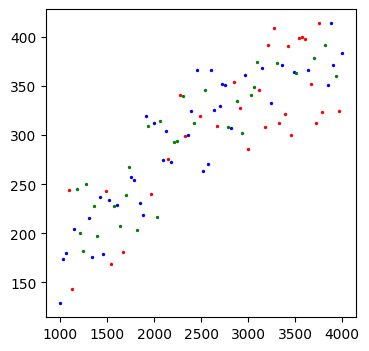

In [259]:
x_train, y_train, x_val, y_val, x_test, y_test, mse_train, mse_val = increasing_polynom(filepath="./c2w3_lab2_data1.csv", verbose=True)

fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(x_train,y_train,c='b',s=2)
ax.scatter(x_val,y_val,c='r',s=2)
ax.scatter(x_test,y_test,c='g',s=2)
plt.show()

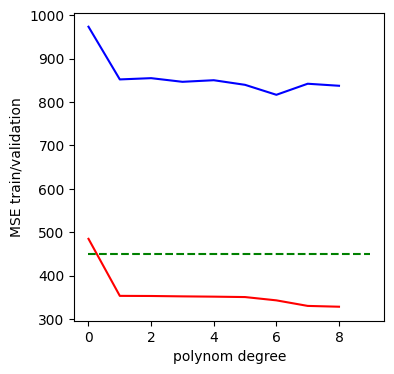

In [263]:
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(mse_train[1:], c='r', label='train mse')
ax.plot(mse_val[1:], c='b', label='validation mse')
ax.plot(np.repeat(450, len(mse_train)), c='g', linestyle='--', label='baseline')
ax.set_xlabel("polynom degree")
ax.set_ylabel("MSE train/validation")
plt.show()

<b>Conclusion:</b>

There is no high bias problem for where Red line (train error) is lower than green (baseline).
With increase in polynomial degree, we can see ideal range of polynomial features.

## Add additional features

Let's assume the data above was analyzed and now we collected more inputs / features.
Now use another dataset with 3 features, and analyse the effect of increasing polynom degree.

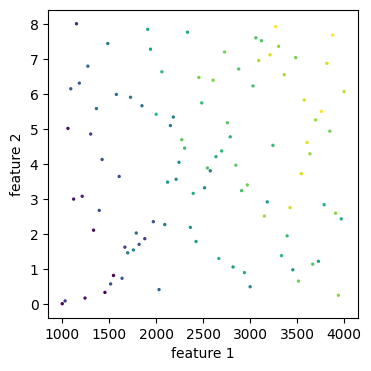

In [264]:
x_train, y_train, x_val, y_val, x_test, y_test, mse_train, mse_val = increasing_polynom("./c2w3_lab2_data2.csv", max_degree=6)

fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(x_train[:,0], x_train[:,1],c=y_train,s=2)
ax.scatter(x_val[:,0], x_val[:,1],c=y_val,s=2)
ax.scatter(x_test[:,0], x_test[:,1],c=y_test,s=2)
ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')
plt.show()

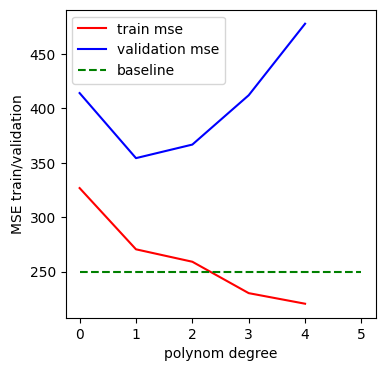

In [266]:
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(mse_train[1:], c='r', label='train mse')
ax.plot(mse_val[1:], c='b', label='validation mse')
ax.plot(np.repeat(250, len(mse_train)), c='g', linestyle='--', label='baseline')
ax.set_xlabel("polynom degree")
ax.set_ylabel("MSE train/validation")
plt.legend()
plt.show()

<b>Conclusion:</b>

with more features training error is closer to baseline. There is no high bias problem anymore for the most part.

## Decreasing the regularization parameter

If we introduced regularization parameter too high, our model may underfit. Let's reduce lambda on a 4th degree polynomial model (using Ridge class)

In [255]:
def change_alpha(filename, polynomial_degree = 4, lambdas = []):

    # read Inputs

    inputs = np.loadtxt(filename, delimiter=",")
    x = inputs[:,:-1]
    y = inputs[:,-1]

    x_train, x_, y_train, y_ = train_test_split(x,y,train_size=0.4, shuffle=True)
    x_val, x_test, y_val, y_test = train_test_split(x_,y_,train_size=0.5)

    # scale input features

    scaler = StandardScaler()
    scaler.fit(x)
    x_train_scaled = scaler.transform(x_train)
    x_val_scaled = scaler.transform(x_val)
    x_test_scaled = scaler.transform(x_test)

    # expand to required polynom degree

    poly = PolynomialFeatures(degree=polynomial_degree)
    x_train_scaled_poly = poly.fit_transform(x_train_scaled)
    x_val_scaled_poly = poly.transform(x_val_scaled)

    # errors

    lambdas_to_try = len(lambdas)
    mse_train = np.zeros(lambdas_to_try)
    mse_val = np.zeros(lambdas_to_try)

    for i in range(lambdas_to_try):

        # define model

        model = Ridge(alpha=lambdas[i]) # equivalent of LinearRegression with punishment to squared weights
        model.fit(x_train_scaled_poly, y_train)
        
        prediction = model.predict(x_train_scaled_poly)
        mse_train[i] = mean_squared_error(y_train, prediction) / 2
    
        prediction = model.predict(x_val_scaled_poly)
        mse_val[i] = mean_squared_error(y_val, prediction) / 2

    return mse_train, mse_val

Plot the results

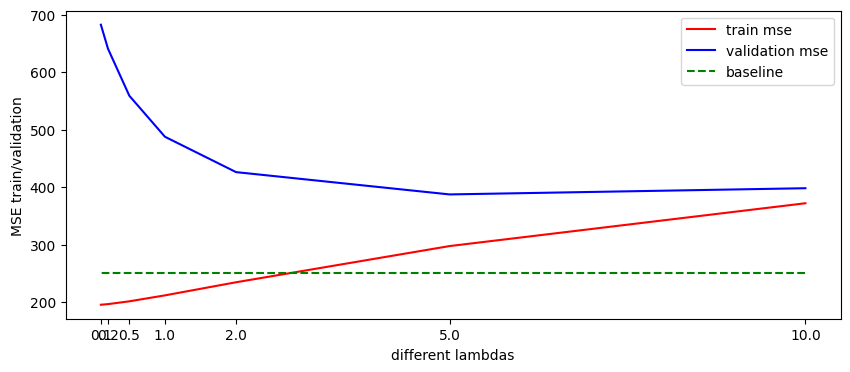

In [268]:
lambdas = [10,5,2,1,0.5,0.2,0.1]

mse_train, mse_val = change_alpha("./c2w3_lab2_data2.csv", polynomial_degree = 4, lambdas = lambdas)

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(lambdas, mse_train, c='r', label='train mse')
ax.plot(lambdas, mse_val, c='b', label='validation mse')
ax.plot(lambdas, np.repeat(250,len(lambdas)), linestyle='--', label='baseline', c='g')
ax.set_xticks(lambdas)
ax.set_xlabel("different lambdas")
ax.set_ylabel("MSE train/validation")
plt.legend()
plt.show()

<b>Conclusion:</b>

The resulting plot shows an initial $\lambda$ of '10' training error worse than the baseline at that point. This implies that it is placing a huge penalty on weights 'w', and prevents the model from learning more complex patters in the data. As $\lambda$ decreases - the model loosens this restriction and the training error is able to approach the baseline performance.

# How to treat High Variance (overfitting) 

## Increasing regularization parameter

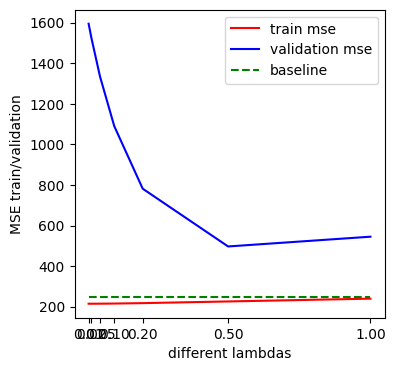

In [270]:
lambdas = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]

mse_train, mse_val = change_alpha("./c2w3_lab2_data2.csv", polynomial_degree = 4, lambdas = lambdas)

fig, ax = plt.subplots(figsize=(4,4))
ax.plot(lambdas, mse_train, c='r', label='train mse')
ax.plot(lambdas, mse_val, c='b', label='validation mse')
ax.plot(lambdas, np.repeat(250,len(lambdas)), linestyle='--', label='baseline', c='g')
ax.set_xticks(lambdas)
ax.set_xlabel("different lambdas")
ax.set_ylabel("MSE train/validation")
plt.legend()
plt.show()

<b>Conclusion:</b>

In contrast with the example just above, setting a very small $\lambda$ will keep the model low bias but might not do much to improve the variance (overfit). As shown below, cross validation can be improved by increasing the value of $\lambda$

## Try smaller sets of features

Two scenarios:
* polynom is too high degree, or 
* irrelevant features were used (ex. "pacient ID" in predicting a tumor)

To illustrate how removing features can improve performance, below we will do polynomial regression for 2 datasets: the same data as above (2 featrues) and another with a random ID column (3 features).


 2 features dataset: [3.18181818e+03 2.90909091e+00]
 3 features with 1st column is random: [1.86383490e+07 1.06060606e+03 5.01010101e+00]


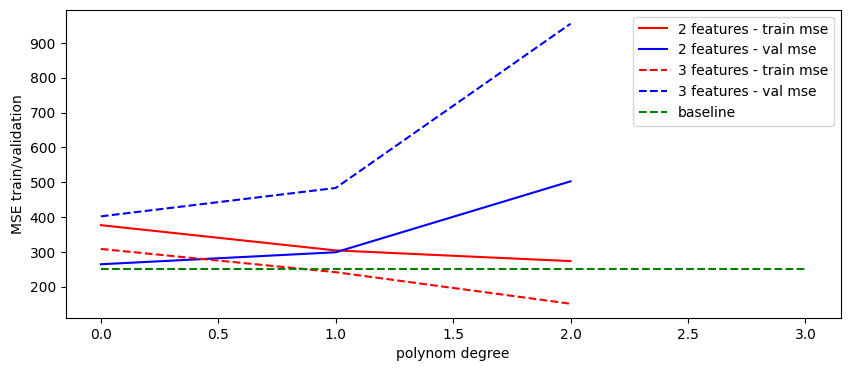

In [277]:
fig, ax = plt.subplots(figsize=(10,4))

x_train, y_train, x_val, y_val, x_test, y_test, mse_train, mse_val = increasing_polynom("./c2w3_lab2_data2.csv", max_degree=4)
print(f" 2 features dataset: {x_train[0]}")

ax.plot(mse_train[1:], c='r', label='2 features - train mse')
ax.plot(mse_val[1:], c='b', label='2 features - val mse')

x_train, y_train, x_val, y_val, x_test, y_test, mse_train, mse_val = increasing_polynom("./c2w3_lab2_data3.csv", max_degree=4)
print(f" 3 features with 1st column is random: {x_train[0]}")

ax.plot(mse_train[1:], c='r', label='3 features - train mse', linestyle='--')
ax.plot(mse_val[1:], c='b', label='3 features - val mse', linestyle='--')

ax.plot(np.repeat(250, len(mse_train)), c='g', linestyle='--', label='baseline')
ax.set_xlabel("polynom degree")
ax.set_ylabel("MSE train/validation")
plt.legend()
plt.show()

<b>Conclusion:</b>

* 3 features train (red) is faster to overfit, but validation error shoots up
    * model learns from higher polynom and random ID
* 3 features validation is higher than 2 features, because it has no random ID
* gap between train and validation error is a lot wider for dotted lines (random ID)

## Get more training samples

In [339]:
def change_train_sample(filename, polynomial_degree = 4, sample_size = []):

    # read Inputs

    inputs = np.loadtxt(filename, delimiter=",")
    x = inputs[:,:-1]
    y = inputs[:,-1]

    # errors

    samples_to_try = len(sample_size)
    mse_train = np.zeros(samples_to_try)
    mse_val = np.zeros(samples_to_try)

    for i in range(samples_to_try):

        calc_index = int(x.shape[0]*sample_size[i])
        
        x_run = x[:calc_index]
        y_run = y[:calc_index]

        x_train, x_, y_train, y_ = train_test_split(x_run,y_run,train_size=0.4,shuffle=True)
        x_val, x_test, y_val, y_test = train_test_split(x_,y_,train_size=0.5)

        # scale input features

        scaler = StandardScaler()
        scaler.fit(x_run)
        x_train_scaled = scaler.transform(x_train)
        x_val_scaled = scaler.transform(x_val)
        x_test_scaled = scaler.transform(x_test)

        # expand to required polynom degree

        poly = PolynomialFeatures(degree=polynomial_degree)
        x_train_scaled_poly = poly.fit_transform(x_train_scaled)
        x_val_scaled_poly = poly.transform(x_val_scaled)

        # define model

        model = LinearRegression()
        model.fit(x_train_scaled_poly, y_train)
        
        prediction = model.predict(x_train_scaled_poly)
        mse_train[i] = mean_squared_error(y_train, prediction) / 2
    
        prediction = model.predict(x_val_scaled_poly)
        mse_val[i] = mean_squared_error(y_val, prediction) / 2

    return mse_train, mse_val, sample_size

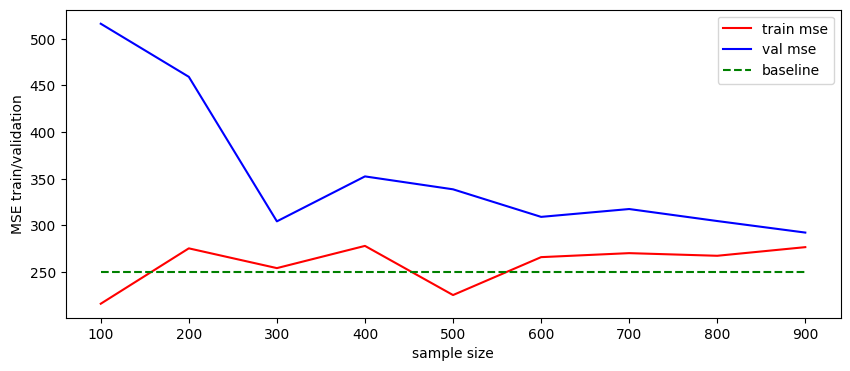

In [340]:
sample_size = np.arange(0.1,1,0.1)
mse_train, mse_val, sample_size = change_train_sample("./c2w3_lab2_data4.csv", polynomial_degree = 4, sample_size = sample_size)

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(sample_size*1000, mse_train, c='r', label='train mse')
ax.plot(sample_size*1000, mse_val, c='b', label='val mse')
ax.plot(sample_size*1000, np.repeat(250, len(sample_size)), c='g', linestyle='--', label='baseline')
ax.set_xlabel("sample size")
ax.set_ylabel("MSE train/validation")
plt.legend()
plt.show()


<b>Conclusion:</b>

As sample size increases, so do train set - we can see larger the sample closer train error to validation error. Another interesting thing we see is that increasing sample size will not solve High Bias problem. That's because the training error remains relatively flat even as the dataset increases.